In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import PolynomialFeatures

In [3]:
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [4]:
# Считываем данные, первый файл из архива
df = pd.read_csv('https://drive.google.com/u/0/uc?id=18BCBQSpfnun-_jddYr4lYOFVsv4wgoIS&export=download')
# Убедимся что всё нормально считалось, посмотрим на начало и конец таблицы
df.head(12)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [5]:
df.tail(12)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
291,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
292,58,0,0,170,225,1,0,146,1,2.8,1,2,1,0
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3,0
294,44,1,0,120,169,0,1,144,1,2.8,0,0,1,0
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0


In [6]:
df.shape

(303, 14)

In [7]:
# Посмотрим на данные во втором файле из архива
df_sat = pd.read_csv('https://drive.google.com/u/0/uc?id=15gNigZ-DEh0St3vqrIa6RGxPmg_mmoU9&export=download')
df_sat.head(10)

,98.6
0,98.6
1,98.6
2,98.6
3,98.1
4,97.5
5,97.5
6,97.5
7,97.5
8,97.5
9,97.5


In [8]:
# Данные в первом и втором файлах имеют разное количество примеров, не понятно как их можно совместить
# Поэтому данные во втором файле использовать не будем
df_sat.shape

(3585, 1)

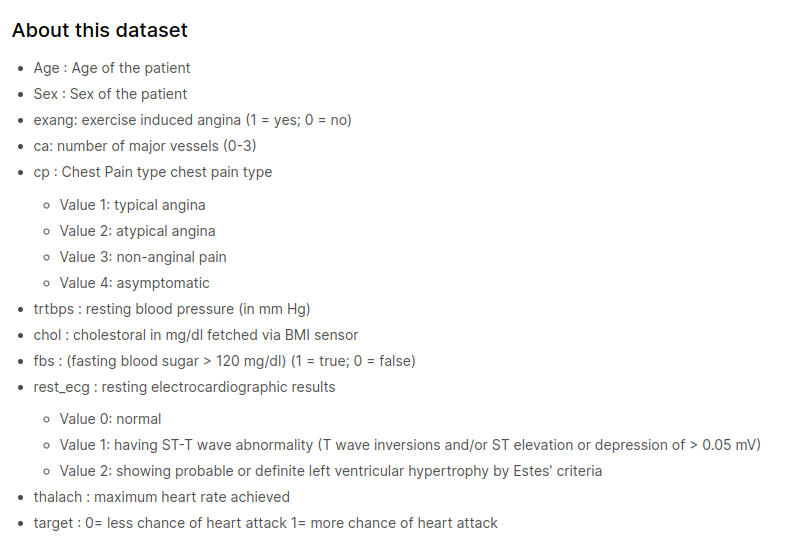

In [9]:
# Назначаем имена колонок в соответствии с описанием от поставщика данных
columns = ('age sex chest-pain-type r-blood-prs cholestoral f-blood-sugar>120 rest-ecg max-heart-rate '
           'ex-ind-ang old-peak slope num-maj-ves thal-rate target')
df.columns = columns.split()
df.head()

,age,sex,chest-pain-type,r-blood-prs,cholestoral,f-blood-sugar>120,rest-ecg,max-heart-rate,ex-ind-ang,old-peak,slope,num-maj-ves,thal-rate,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [10]:
# Уберем повторяющиеся записи, как видно был всего один дубликат
df.drop_duplicates(inplace=True)
df.shape

(302, 14)

Посмотрим какие типы данных присутствуют в таблице и есть ли у нас пропуски в данных.

int64 тут явно излишен, особенно для категориальных признаков, 
но учитывая общий маленький объем данных не будем тут ничего трогать

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                302 non-null    int64  
 1   sex                302 non-null    int64  
 2   chest-pain-type    302 non-null    int64  
 3   r-blood-prs        302 non-null    int64  
 4   cholestoral        302 non-null    int64  
 5   f-blood-sugar>120  302 non-null    int64  
 6   rest-ecg           302 non-null    int64  
 7   max-heart-rate     302 non-null    int64  
 8   ex-ind-ang         302 non-null    int64  
 9   old-peak           302 non-null    float64
 10  slope              302 non-null    int64  
 11  num-maj-ves        302 non-null    int64  
 12  thal-rate          302 non-null    int64  
 13  target             302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [12]:
# Посмотрим на распределение данных, явных особенностей не видно
# всё выглядит вполне разумно
df.describe()

,age,sex,chest-pain-type,r-blood-prs,cholestoral,f-blood-sugar>120,rest-ecg,max-heart-rate,ex-ind-ang,old-peak,slope,num-maj-ves,thal-rate,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


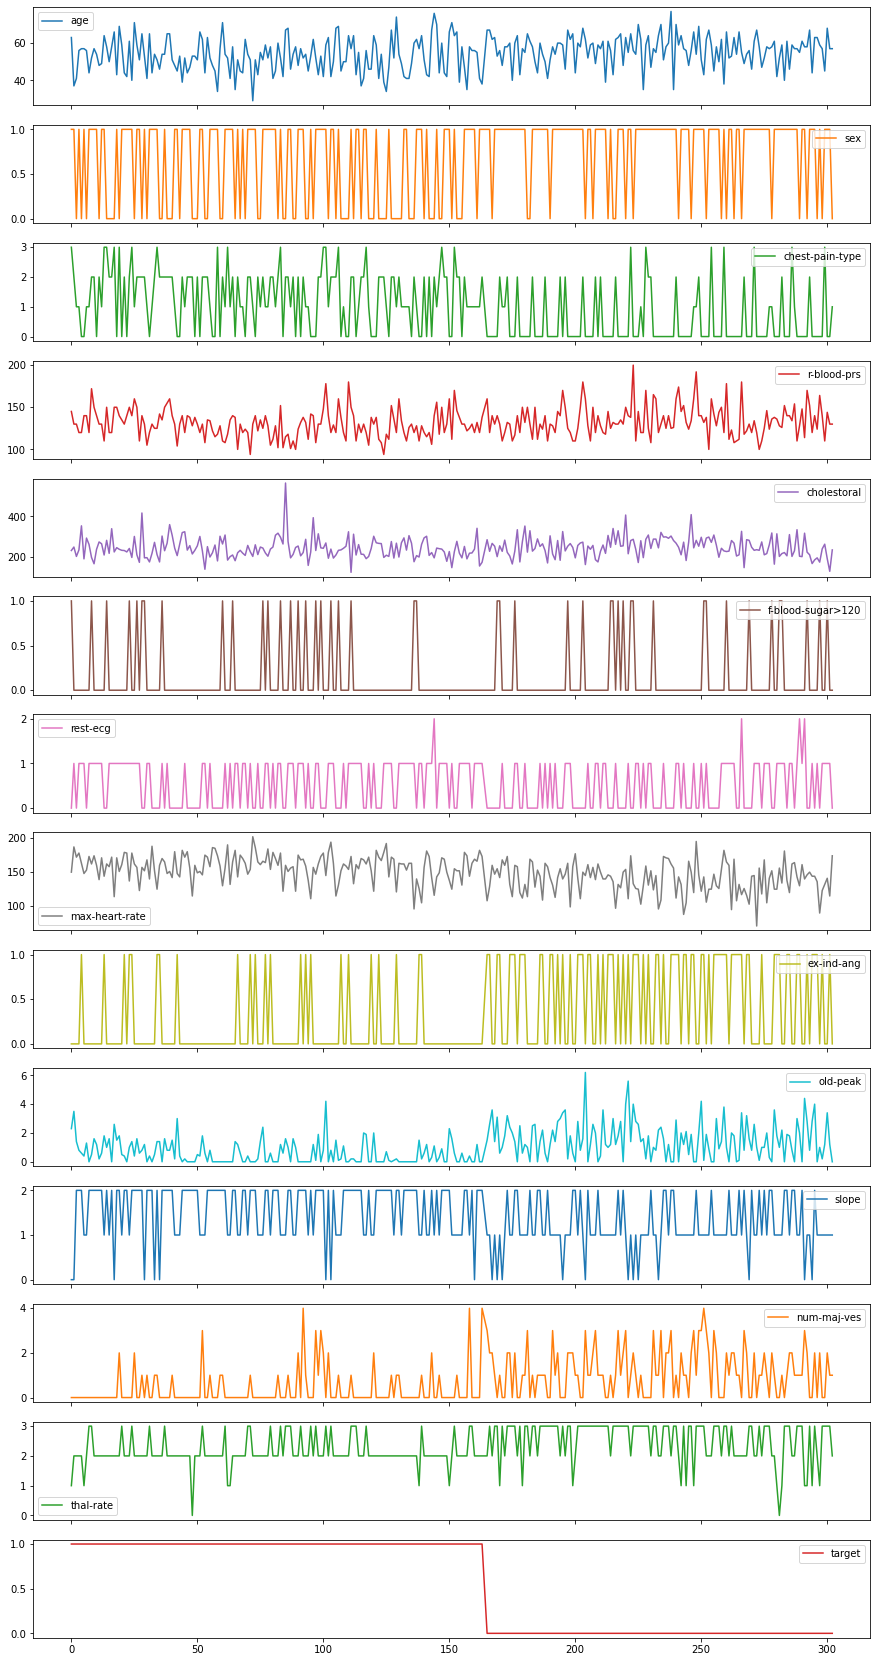

In [13]:
df.plot(subplots=True, figsize = (15, 30));

По визуализации можно выделить явный одиночный пик на графике 'cholestoral' и
несколько пиков на графике 'old-peak'.

Удалим записи которые сильно отличаются от среднего.
Датасет маленький и, кажется, что не стоит сильно его фильтровать.

In [14]:
df[df['cholestoral']>560]

,age,sex,chest-pain-type,r-blood-prs,cholestoral,f-blood-sugar>120,rest-ecg,max-heart-rate,ex-ind-ang,old-peak,slope,num-maj-ves,thal-rate,target
85,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1


In [15]:
df.drop(index=85, inplace=True)

In [16]:
df.shape

(301, 14)

In [17]:
op_crit = df['old-peak'].mean()+3*df['old-peak'].std()
op_crit

4.53001745943048

In [18]:
df[df['old-peak']>op_crit]

,age,sex,chest-pain-type,r-blood-prs,cholestoral,f-blood-sugar>120,rest-ecg,max-heart-rate,ex-ind-ang,old-peak,slope,num-maj-ves,thal-rate,target
204,62,0,0,160,164,0,0,145,0,6.2,0,3,3,0
221,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0


In [19]:
df.drop(index = df[df['old-peak']>op_crit].index, inplace=True)

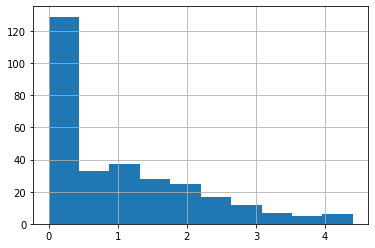

In [20]:
df['old-peak'].hist();

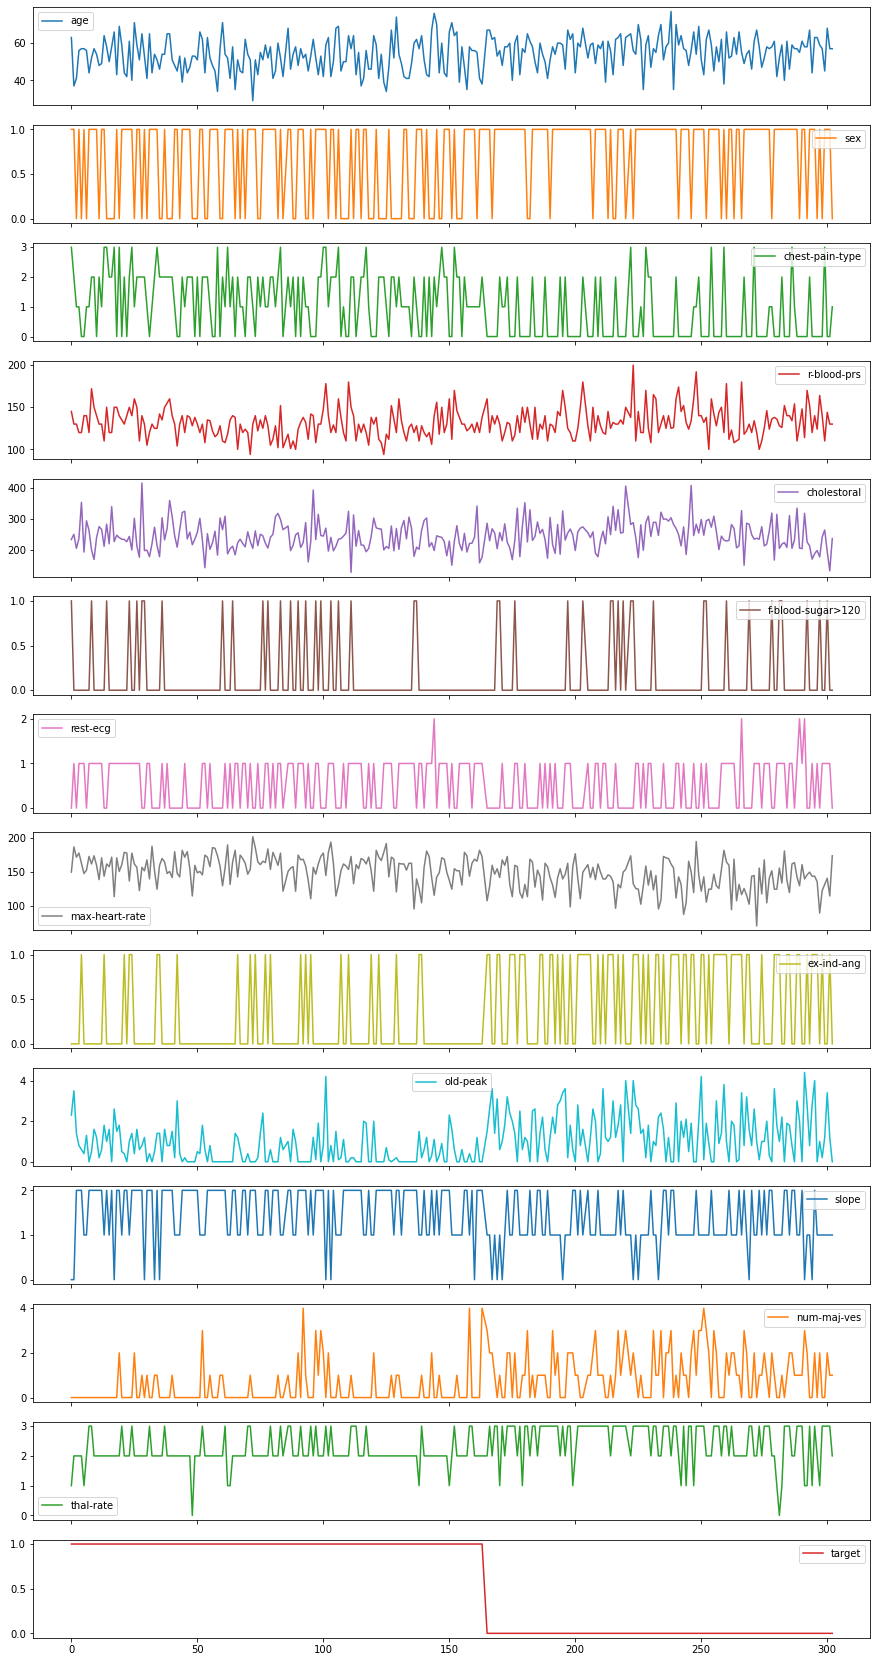

In [21]:
df.plot(subplots=True, figsize = (15, 30));

Так немного лучше...4 пика на графике rest-ecg трогать не будем т.к. это категориальный признак.

Посмотрим как распределены данные по классам.
Как видно, данные неплохо сбалансированы

In [22]:
df['target'].value_counts()

1    163
0    136
Name: target, dtype: int64

Сгруппируем данные по классам и посмотрим можно ли выделить зависимость целевой переменной от признаков

In [23]:
columns_to_show = ['age', 'chest-pain-type', 'ex-ind-ang', 'old-peak']

df.groupby(['target'])[columns_to_show].agg([np.mean, np.std, np.min, np.max])

age                     chest-pain-type                      \
             mean       std amin amax            mean       std amin amax   
target                                                                      
0       56.573529  8.006139   35   77        0.485294  0.910720    0    3   
1       52.496933  9.473403   29   76        1.368098  0.955537    0    3   

       ex-ind-ang                      old-peak                      
             mean       std amin amax      mean       std amin amax  
target                                                               
0        0.551471  0.499182    0    1  1.522059  1.197818  0.0  4.4  
1        0.141104  0.349202    0    1  0.580368  0.780065  0.0  4.2

Уже по такой таблице видно что есть признаки которые хорошо коррелируют с целевой переменной.

Посмотрим на матрицу линейной корреляции признаков между собой и с целевой переменной

In [24]:
import seaborn as sns
sns.set(style='whitegrid', font_scale=1.15)

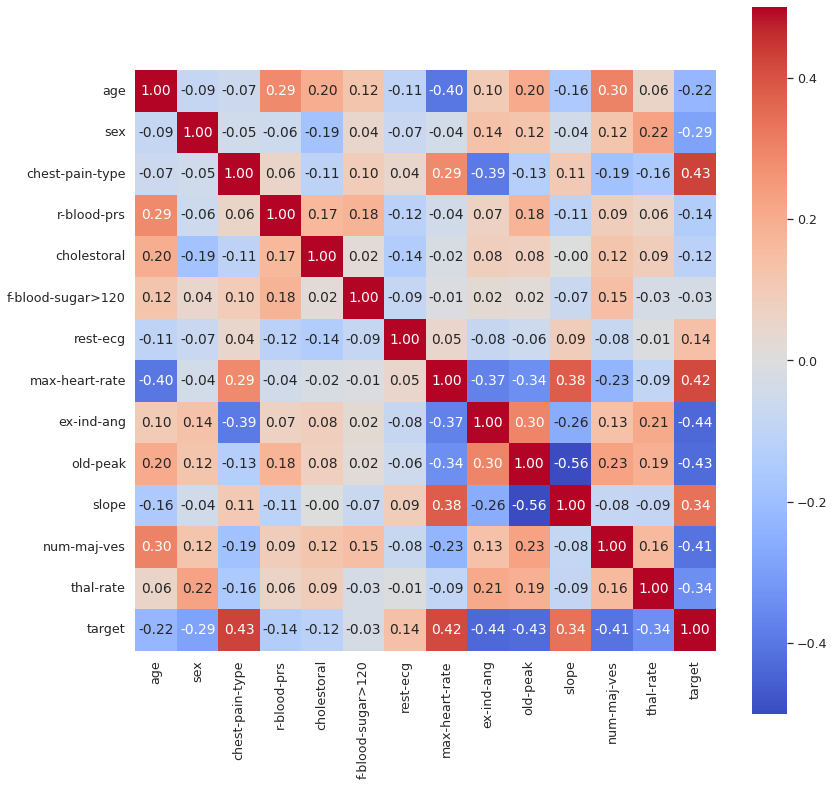

In [25]:
plt.subplots(figsize=(13,13))
sns.heatmap(df.corr(), fmt=".2f", annot=True, square=True, cmap='coolwarm', vmin=-0.5, vmax=0.5);

Опять же видно, что есть ряд признаков которые коррелируют с целевой переменной...как я понимаю, это указывает на то, что в процессе обучения моделей эти зависимости будут обнаружены, учтены и в итоге можно
рассчитывать на вполне нормальное качество предсказаний даже простых линейных моделей

При этом, есть и коррелирующие между собой признаки...посмотрим на них более внимательно

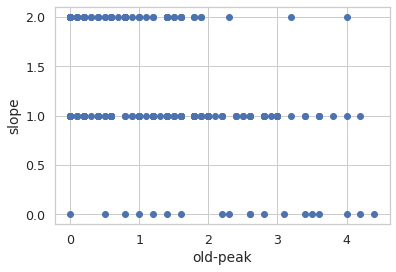

In [26]:
plt.scatter(df['old-peak'], df['slope'])
plt.xlabel('old-peak')
plt.ylabel('slope');

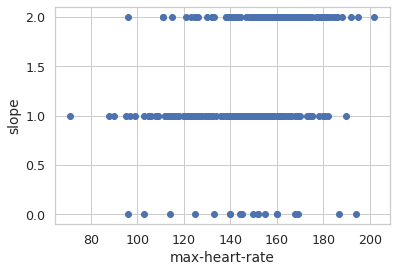

In [27]:
plt.scatter(df['max-heart-rate'], df['slope'])
plt.xlabel('max-heart-rate')
plt.ylabel('slope');

Визуально не кажется что тут присутствует явная линейная зависимость между признаками...оставим пока все признаки как есть...можно будет вернуться к этому в случае если качество предсказаний моделей будет неудовлетворительным

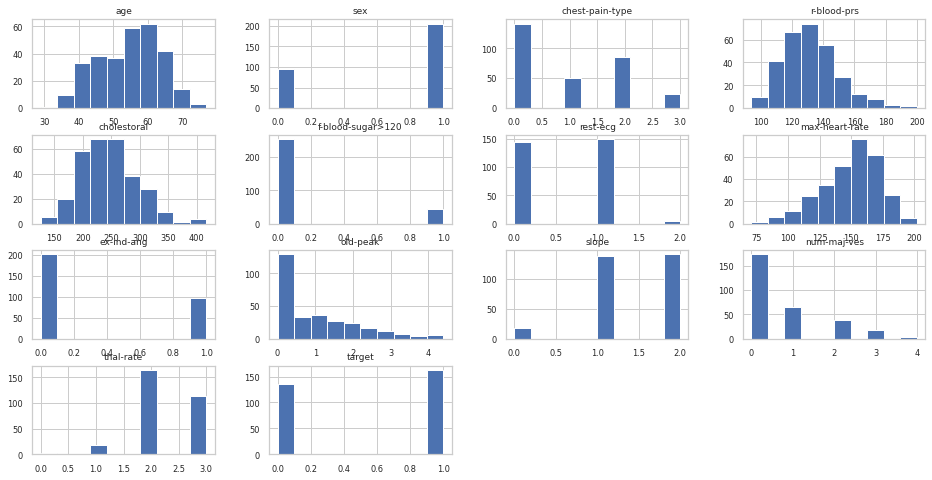

In [28]:
sns.set(style='whitegrid', font_scale=0.75)
df.hist(figsize=(16,8));

По гистограммам можно сказать что числовые признаки распределены нормально.

Ряд категориальных признаков (f-blood-sugar, rest-ecg, slope) имеют некоторую несбалансированность...не понятно надо с этим что-то делать или нет...пока оставляем как есть...

In [29]:
from sklearn.compose import ColumnTransformer
#from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

Закодируем категориальные признаки, используя OneHot кодировку...при этом исключим из всех признаков нулевую категорию, чтобы не плодить лишние колонки.
Колонки в которых только 2 значения 0 и 1 трогать не будем...они уже и так фактически закодированы

In [30]:
df_encoded = df.copy()

In [31]:
df_target = df_encoded['target']
df_encoded.drop('target', axis = 1, inplace = True)

In [32]:
#cat_columns = ['sex', 'f-blood-sugar>120','ex-ind-ang', 'chest-pain-type', 'rest-ecg', 'slope', 
#               'num-maj-ves', 'thal-rate']
cat_columns = ['chest-pain-type', 'rest-ecg', 'slope', 'num-maj-ves', 'thal-rate']

In [33]:
df_encoded = pd.get_dummies(df_encoded, columns=cat_columns, drop_first=True)

In [34]:
df_encoded

,age,sex,r-blood-prs,cholestoral,f-blood-sugar>120,max-heart-rate,ex-ind-ang,old-peak,chest-pain-type_1,chest-pain-type_2,chest-pain-type_3,rest-ecg_1,rest-ecg_2,slope_1,slope_2,num-maj-ves_1,num-maj-ves_2,num-maj-ves_3,num-maj-ves_4,thal-rate_1,thal-rate_2,thal-rate_3
0,63,1,145,233,1,150,0,2.3,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,0,1,0,1,0,0,0,0,0,0,0,0,1,0
2,41,0,130,204,0,172,0,1.4,1,0,0,0,0,0,1,0,0,0,0,0,1,0
3,56,1,120,236,0,178,0,0.8,1,0,0,1,0,0,1,0,0,0,0,0,1,0
4,57,0,120,354,0,163,1,0.6,0,0,0,1,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,123,1,0.2,0,0,0,1,0,1,0,0,0,0,0,0,0,1
299,45,1,110,264,0,132,0,1.2,0,0,1,1,0,1,0,0,0,0,0,0,0,1
300,68,1,144,193,1,141,0,3.4,0,0,0,1,0,1,0,0,1,0,0,0,0,1
301,57,1,130,131,0,115,1,1.2,0,0,0,1,0,1,0,1,0,0,0,0,0,1


Для нормализации числовых признаков разделим датасет на train и test части...создадим ColumnTransformer обучим его на train части и применим к train и test

In [35]:
df_encoded['target'] = df_target
df_train, df_test = train_test_split(df_encoded, test_size=0.2) #, random_state=42)

In [36]:
df_train.shape

(239, 23)

In [37]:
df_test.shape

(60, 23)

In [38]:
num_columns = ['age', 'r-blood-prs', 'cholestoral', 'max-heart-rate', 'old-peak']

In [39]:
ct_nums = ColumnTransformer([('num_prep', StandardScaler(), num_columns)])

In [40]:
 df_trans_train = ct_nums.fit_transform(df_train) 

In [41]:
tmp = pd.DataFrame(df_trans_train,
                   columns=num_columns,
                   index=df_train.index)
df_train[num_columns] = tmp[num_columns]

In [42]:
df_train

,age,sex,r-blood-prs,cholestoral,f-blood-sugar>120,max-heart-rate,ex-ind-ang,old-peak,chest-pain-type_1,chest-pain-type_2,chest-pain-type_3,rest-ecg_1,rest-ecg_2,slope_1,slope_2,num-maj-ves_1,num-maj-ves_2,num-maj-ves_3,num-maj-ves_4,thal-rate_1,thal-rate_2,thal-rate_3,target
229,1.067695,1,-0.365929,1.286628,0,-0.807692,1,0.683203,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0
62,-0.232029,1,-0.768692,-1.196826,0,1.716525,0,-0.921131,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1
182,0.742764,0,-0.078241,1.710632,0,0.818075,0,-0.921131,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
300,1.500936,1,0.727284,-1.055491,1,-0.379859,0,2.109278,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0
299,-0.990201,1,-1.228992,0.378047,0,-0.764909,0,0.148425,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,-1.098511,1,-0.653617,-1.540067,0,-0.251509,1,1.574500,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
22,-1.315132,1,0.497134,-0.389199,0,1.203125,0,-0.921131,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1
92,-0.232029,1,0.382059,-0.449771,0,0.818075,0,-0.921131,0,1,0,1,0,0,1,0,0,0,1,0,1,0,1
133,-1.423442,1,-1.228992,-0.207482,0,0.133541,0,-0.921131,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1


Убедимся что теперь распределение числовых признаков близко к стандартному нормальному

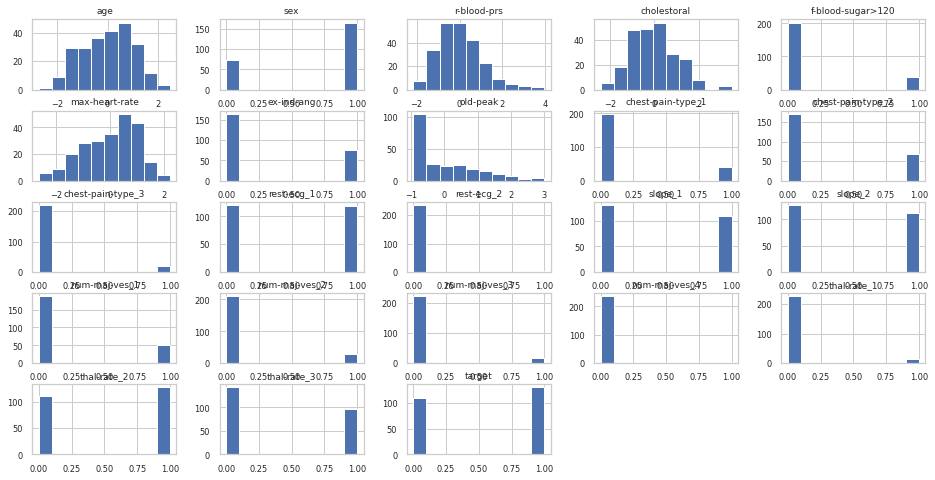

In [43]:
df_train.hist(figsize=(16,8));

In [44]:
df_trans_test = ct_nums.transform(df_test)
tmp = pd.DataFrame(df_trans_test,
                   columns=num_columns,
                   index=df_test.index)
df_test[num_columns] = tmp[num_columns]

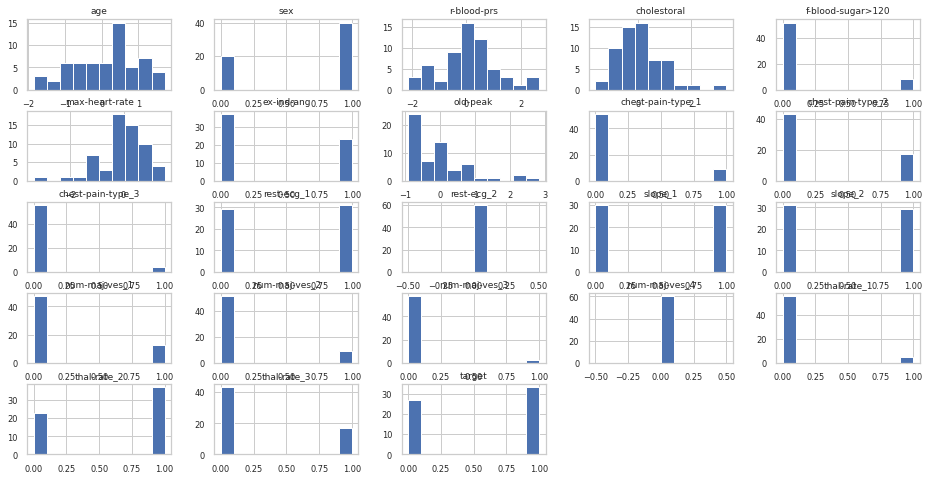

In [45]:
df_test.hist(figsize=(16,8));

In [46]:
df_save_train = df_train.copy()
df_save_test = df_test.copy()

In [47]:
# Выделим из df_train и df_test массивы признаков(X) и классов(y)
X_train = np.array(df_train[df_train.columns[:-1]])
y_train = np.array(df_train[df_train.columns[-1]])
X_test = np.array(df_test[df_test.columns[:-1]])
y_test = np.array(df_test[df_test.columns[-1]])

In [48]:
X_train

array([[ 1.06769474,  1.        , -0.36592908, ...,  0.        ,
         0.        ,  1.        ],
       [-0.23202874,  1.        , -0.76869182, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.74276387,  0.        , -0.07824142, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.23202874,  1.        ,  0.38205885, ...,  0.        ,
         1.        ,  0.        ],
       [-1.42344193,  1.        , -1.22899209, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.20121242,  1.        , -0.07824142, ...,  0.        ,
         0.        ,  1.        ]])

In [49]:
y_train

array([0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0])

In [50]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### KNeighborsClassifier

Начнем с самого простого классификатора KNN.

В качестве оценки всех моделей будем использовать показатель f1_macro.

In [51]:
metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [52]:
# значение, которое будет принимать наше число соседей
knn_grid_values = np.array(np.linspace(1, 49, 25), dtype='int')
knn_grid_values

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49])

In [53]:
knn = KNeighborsClassifier()

# Зададим сетку - среди каких значений выбирать наилучший параметр.
knn_grid = {'weights': ['uniform', 'distance'],
           'n_neighbors': knn_grid_values,
           'metric': ['manhattan', 'euclidean']} 
#            'p':[1, 2]}

# Создаем объект кросс-валидации...
# уменьшим количество фолдов в разбиении до 4...из-за маленького датасета
knn_gs = GridSearchCV(knn, knn_grid, cv=4, n_jobs=-1, scoring='f1_macro', verbose = 0)

# Обучаем его
knn_gs.fit(X_train, y_train)

# Получаем предсказания от классификатора с лучшими подобранными параметрами
knn_pred = knn_gs.predict(X_test)

In [54]:
knn_gs.cv_results_

{'mean_fit_time': array([0.00092274, 0.00077927, 0.00070214, 0.00079614, 0.00077009,
        0.00069165, 0.00108117, 0.00067413, 0.00069487, 0.00067538,
        0.00070912, 0.00062585, 0.00068647, 0.00068027, 0.00068277,
        0.00100857, 0.00174427, 0.0006566 , 0.00087887, 0.00077188,
        0.00069928, 0.00066257, 0.00067562, 0.00061464, 0.00066632,
        0.00066459, 0.0006761 , 0.00093383, 0.00066185, 0.00064147,
        0.00066751, 0.00080079, 0.00069565, 0.00066262, 0.00067616,
        0.00066078, 0.00063664, 0.00084597, 0.00068539, 0.0020119 ,
        0.00065464, 0.0006094 , 0.00062799, 0.00068206, 0.00064552,
        0.00068229, 0.00068319, 0.00066024, 0.00079948, 0.00068635,
        0.00076073, 0.00072002, 0.00066787, 0.00065577, 0.00067943,
        0.0006817 , 0.00115061, 0.00082421, 0.00067306, 0.00065947,
        0.00063431, 0.00062352, 0.00056499, 0.00060809, 0.00065219,
        0.00067657, 0.00066227, 0.00066829, 0.0006358 , 0.0007233 ,
        0.00070435, 0.00074351,

In [55]:
knn_gs.cv_results_['params']

[{'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'},
 {'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'distance'},
 {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'},
 {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'},
 {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'},
 {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'},
 {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'},
 {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'},
 {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'},
 {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'},
 {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'uniform'},
 {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'},
 {'metric': 'manhattan', 'n_neighbors': 13, 'weights': 'uniform'},
 {'metric': 'manhattan', 'n_neighbors': 13, 'weights': 'distance'},
 {'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'uniform'}

In [56]:
len(knn_gs.cv_results_['params'])

100

In [57]:
def ShowKNNgs(knn_gs):
    # Строим график зависимости качества от числа соседей
    # замечание: результаты обучения хранятся в атрибуте cv_results_ объекта gs

    #grid_plot(knn_grid['n_neighbors'], gs.cv_results_['mean_test_score'][:25], 'n_neighbors', 'KNeighborsClassifier')
    #grid_plot(knn_grid['n_neighbors'], gs.cv_results_['mean_test_score'][25:], 'n_neighbors', 'KNeighborsClassifier')
    sns.set(style='whitegrid', font_scale=1.5)
    plt.figure(figsize=(12, 8))
    plt.grid(True)
    plt.plot(list(knn_gs.cv_results_['param_n_neighbors'])[:50:2], knn_gs.cv_results_['mean_test_score'][:50:2], 'ro-', ms=11, label='manhattan / uniform')
    plt.plot(list(knn_gs.cv_results_['param_n_neighbors'])[1:50:2], knn_gs.cv_results_['mean_test_score'][1:50:2], 'bo-', ms=7, label='manhattan / distance', alpha=0.75)
    plt.plot(list(knn_gs.cv_results_['param_n_neighbors'])[50::2], knn_gs.cv_results_['mean_test_score'][50::2], 'rs--', ms=11, label='euclidean / uniform')
    plt.plot(list(knn_gs.cv_results_['param_n_neighbors'])[51::2], knn_gs.cv_results_['mean_test_score'][51::2], 'bs--', ms=7, label='euclidean / distance', alpha=0.75)
    plt.xticks(knn_grid_values[::2])
    plt.xlabel('n_neighbors')
    plt.ylabel('f1_macro_avg')
    plt.legend()
    plt.title('KNeighborsClassifier');
    

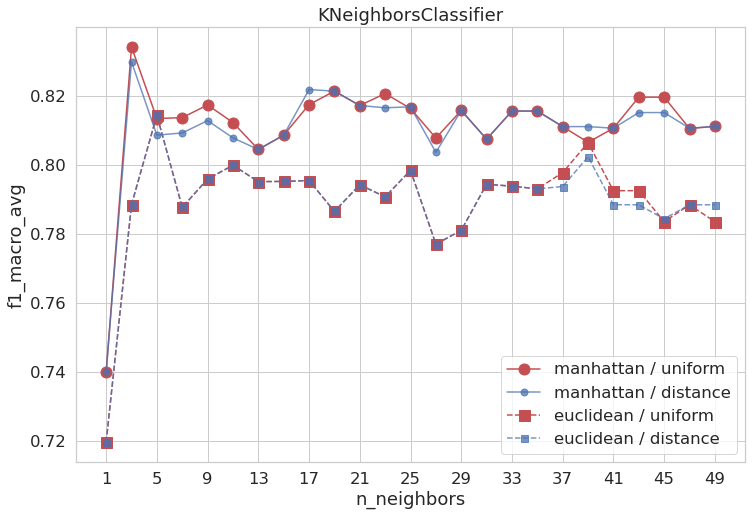

In [58]:
ShowKNNgs(knn_gs)

In [59]:
# best_params_ содержит в себе лучшие подобранные параметры, best_score_ лучшее качество
knn_gs.best_params_, knn_gs.best_score_

({'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'},
 0.8340882606318627)

In [60]:
import matplotlib
from sklearn.metrics import roc_auc_score, precision_recall_curve, roc_curve

In [61]:
def ShowHeat(y_pred, y_real = y_test):
    sns.set(font_scale=1.5)

    fig = plt.figure(figsize=(8,8))
    nn_mtx = metrics.confusion_matrix(y_real, y_pred)
    print(nn_mtx)
    font = {'weight' : 'bold', 'size'   :22}
    matplotlib.rc('xtick', labelsize=20) 
    matplotlib.rc('ytick', labelsize=20) 
    sns.heatmap(nn_mtx, annot=True, fmt="d", 
                xticklabels=['ноль (0)', 'один (1)'], 
                yticklabels=['ноль (0)', 'один (1)'],
                cmap='coolwarm', vmin=0)
    #           cmap="rocket")
    plt.ylabel("Real value")
    plt.xlabel("Predicted value")
    plt.show()
    print(metrics.classification_report(y_real, y_pred))

##### confusion matrix для knn

[[22  5]
 [ 7 26]]


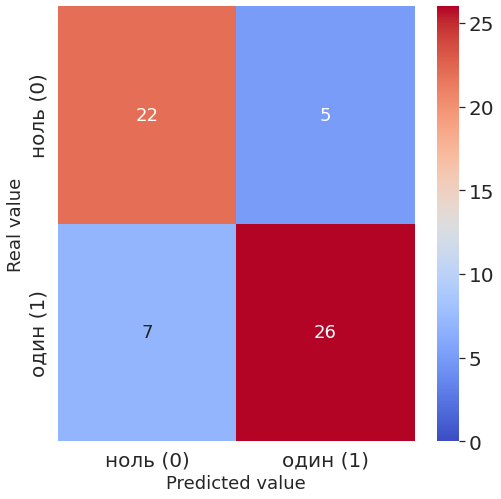

              precision    recall  f1-score   support

           0       0.76      0.81      0.79        27
           1       0.84      0.79      0.81        33

    accuracy                           0.80        60
   macro avg       0.80      0.80      0.80        60
weighted avg       0.80      0.80      0.80        60



In [62]:
ShowHeat(knn_pred)

Как видим, алгоритм вполне нормально справляется с задачей.

Посмотрим что будет если искусственно добавить полиномиальных признаков 2 и 3 степени...
...т.к. изначально у нас было много категориальных признаков в OneHot кодировке т.е. много нулевых значений в 
таблице...в итоге мы получим еще больше нулей в таблице

не понятно улучшит ли это наши прогнозы...

In [63]:
poly2 = PolynomialFeatures(degree=2, include_bias=True)
X2_train = poly2.fit_transform(X_train)
X2_test = poly2.fit_transform(X_test)
X2_train.shape

(239, 276)

[[15 12]
 [ 5 28]]


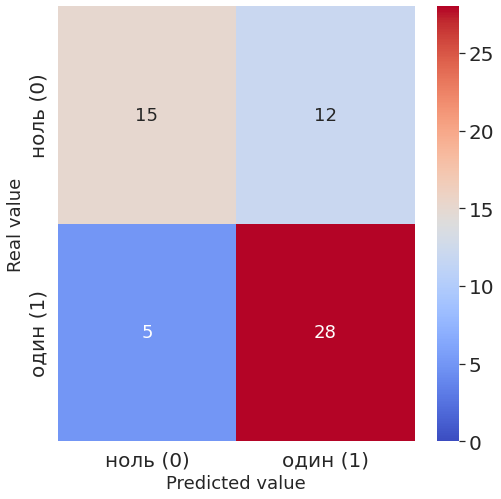

              precision    recall  f1-score   support

           0       0.75      0.56      0.64        27
           1       0.70      0.85      0.77        33

    accuracy                           0.72        60
   macro avg       0.72      0.70      0.70        60
weighted avg       0.72      0.72      0.71        60



In [64]:
knn2_gs = GridSearchCV(knn, knn_grid, cv=4, n_jobs=-1, scoring='f1_macro', verbose = 0)
knn2_gs.fit(X2_train, y_train)
knn2_pred = knn2_gs.predict(X2_test)
ShowHeat(knn2_pred)

In [65]:
poly3 = PolynomialFeatures(degree=3, include_bias=True)
X3_train = poly3.fit_transform(X_train)
X3_test = poly3.fit_transform(X_test)
X3_train.shape

(239, 2300)

[[13 14]
 [ 2 31]]


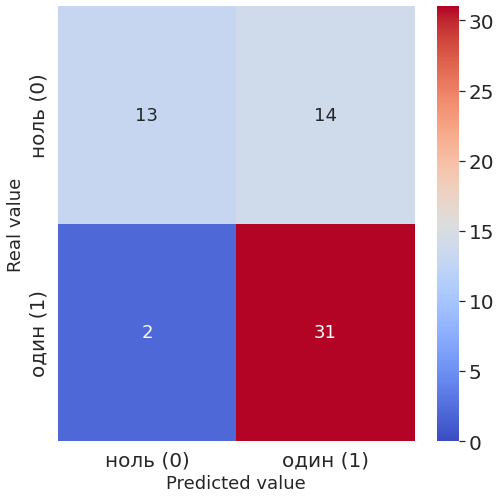

              precision    recall  f1-score   support

           0       0.87      0.48      0.62        27
           1       0.69      0.94      0.79        33

    accuracy                           0.73        60
   macro avg       0.78      0.71      0.71        60
weighted avg       0.77      0.73      0.72        60



In [66]:
knn3_gs = GridSearchCV(knn, knn_grid, cv=4, n_jobs=-1, scoring='f1_macro', verbose = 0)
knn3_gs.fit(X3_train, y_train)
knn3_pred = knn3_gs.predict(X3_test)
ShowHeat(knn3_pred)

При добавлении новых признаков модель стала работать чуть хуже...по ROC кривым так же видно что с увеличение степени полиномиальных признаков площадь под кривой уменьшается...

По ROC кривым не понял что дальше можно делать с этм знанием...куда подставлять найденное/желаемое значение порога (thresholds) чтобы получить желаемую величину метрики?

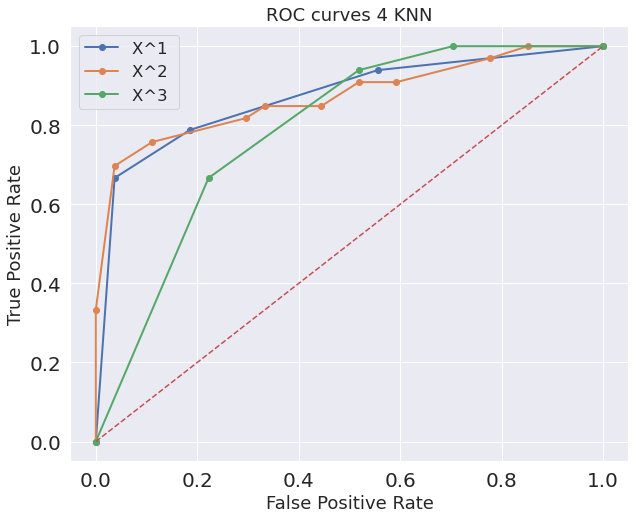

In [67]:
plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = roc_curve(y_test, knn_gs.predict_proba(X_test)[:,1], pos_label=1)
fpr2, tpr2, thresholds2 = roc_curve(y_test, knn2_gs.predict_proba(X2_test)[:,1], pos_label=1)
fpr3, tpr3, thresholds3 = roc_curve(y_test, knn3_gs.predict_proba(X3_test)[:,1], pos_label=1)
lw = 2
plt.plot(fpr, tpr, 'o-', lw=lw, label='X^1 ')
plt.plot(fpr2, tpr2, 'o-', lw=lw, label='X^2 ')
plt.plot(fpr3, tpr3, 'o-', lw=lw, label='X^3 ')
plt.plot([0, 1], [0, 1], '--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves 4 KNN')
plt.legend()
#plt.savefig("ROC.png")
plt.show()

In [68]:
thresholds

array([2.        , 1.        , 0.66666667, 0.33333333, 0.        ])

In [69]:
print(f'KNN ROC_AUC_Score on:')
print(f'X^1 : {np.round(roc_auc_score(y_test, knn_pred),4)}')
print(f'X^2 : {np.round(roc_auc_score(y_test, knn2_pred),4)}')
print(f'X^3 : {np.round(roc_auc_score(y_test, knn3_pred),4)}')

KNN ROC_AUC_Score on:
X^1 : 0.8013
X^2 : 0.702
X^3 : 0.7104


### LogisticRegression

Посмотрим как с тойже задачей справляется логистическая регрессия

In [70]:
logreg = LogisticRegression(solver='saga', max_iter=1000)

# опишем сетку, по которой будем искать

# в каких пределах обычно изменяется коэффициент регуляризации (сила регуляризации) лямбда? от 0 до 1 ?
# т.е. С = 1/лямбда должен быть больше либо равен 1, так?

logreg_grid = {
    'C': [1, 2, 3, 4, 5], 
    'penalty': ['l1', 'l2'],
}

logreg_gs = GridSearchCV(logreg, logreg_grid, n_jobs=-1, cv=4, scoring='f1_macro')

logreg_gs.fit(X_train, y_train)
logreg_pred = logreg_gs.predict(X_test)

In [71]:
# best_params_ содержит в себе лучшие подобранные параметры, best_score_ лучшее качество
logreg_gs.best_params_, logreg_gs.best_score_

({'C': 2, 'penalty': 'l2'}, 0.834972946474648)

Логистическая регрессия справилась чуть лучше чем KNN.
Посмотрим так же её метрики с полиномиальными признаками...

[[22  5]
 [ 4 29]]


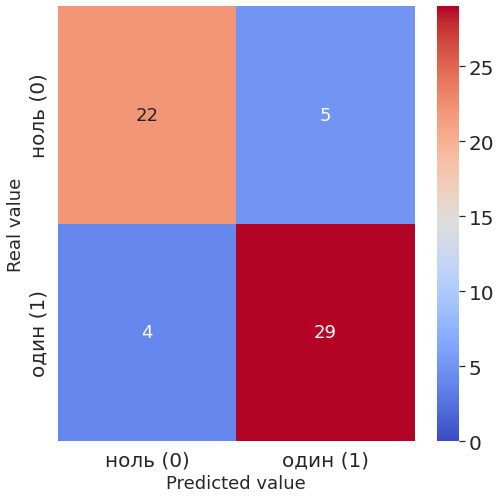

              precision    recall  f1-score   support

           0       0.85      0.81      0.83        27
           1       0.85      0.88      0.87        33

    accuracy                           0.85        60
   macro avg       0.85      0.85      0.85        60
weighted avg       0.85      0.85      0.85        60



In [72]:
ShowHeat(logreg_pred)

In [73]:
%%time
logreg = LogisticRegression(solver='saga', max_iter=1e4)

logreg2_gs = GridSearchCV(logreg, logreg_grid, n_jobs=-1, cv=4, scoring='f1_macro')

logreg2_gs.fit(X2_train, y_train)

logreg2_pred = logreg2_gs.predict(X2_test)

CPU times: user 3.8 s, sys: 11.2 ms, total: 3.81 s
Wall time: 30.5 s


Так же как и для KNN с добавлением полиномиальных признаков модель выдает меньшие метрики...

Кроме того для ЛогРегрессии заметно возрастает время обработки данных.

Простое добавление Dask позволяет конечно просматривать красивые графики, но время счёта только увеличилось.
Пока от Dask не удалось добиться улучшений по времени счёта.

In [74]:
import joblib
from dask.distributed import Client, progress
client = Client(n_workers=2, threads_per_worker=2, memory_limit='2GB')
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 2
Total threads: 4,Total memory: 3.73 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:43037,Workers: 2
Dashboard: http://127.0.0.1:8787/status,Total threads: 4
Started: Just now,Total memory: 3.73 GiB
Comm: tcp://127.0.0.1:38871,Total threads: 2
Dashboard: http://127.0.0.1:40613/status,Memory: 1.86 GiB
Nanny: tcp://127.0.0.1:33241,


In [75]:
%%time
logreg = LogisticRegression(solver='saga', max_iter=1e4)

logreg2_gs = GridSearchCV(logreg, logreg_grid, n_jobs=-1, cv=4, scoring='f1_macro')

with joblib.parallel_backend('dask'):
    logreg2_gs.fit(X2_train, y_train)

logreg2_pred = logreg2_gs.predict(X2_test)

CPU times: user 2.07 s, sys: 539 ms, total: 2.6 s
Wall time: 36.4 s


In [76]:
del client

In [77]:
# best_params_ содержит в себе лучшие подобранные параметры, best_score_ лучшее качество
logreg2_gs.best_params_, logreg2_gs.best_score_

({'C': 2, 'penalty': 'l1'}, 0.7479555977828793)

[[22  5]
 [ 3 30]]


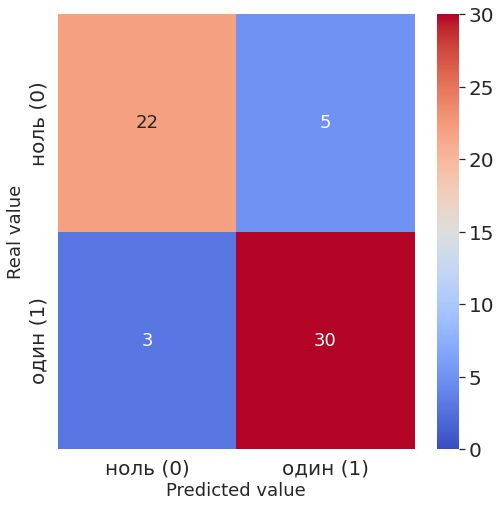

              precision    recall  f1-score   support

           0       0.88      0.81      0.85        27
           1       0.86      0.91      0.88        33

    accuracy                           0.87        60
   macro avg       0.87      0.86      0.86        60
weighted avg       0.87      0.87      0.87        60



In [78]:
ShowHeat(logreg2_pred)

In [79]:
%%time
logreg = LogisticRegression(solver='saga', max_iter=1e4)

logreg3_gs = GridSearchCV(logreg, logreg_grid, n_jobs=-1, cv=4, scoring='f1_macro')
logreg3_gs.fit(X3_train, y_train)

logreg3_pred = logreg3_gs.predict(X3_test)

CPU times: user 56.6 s, sys: 4.3 s, total: 1min
Wall time: 5min 56s


In [80]:
# best_params_ содержит в себе лучшие подобранные параметры, best_score_ лучшее качество
logreg3_gs.best_params_, logreg3_gs.best_score_

({'C': 4, 'penalty': 'l1'}, 0.7764947299003027)

[[19  8]
 [ 4 29]]


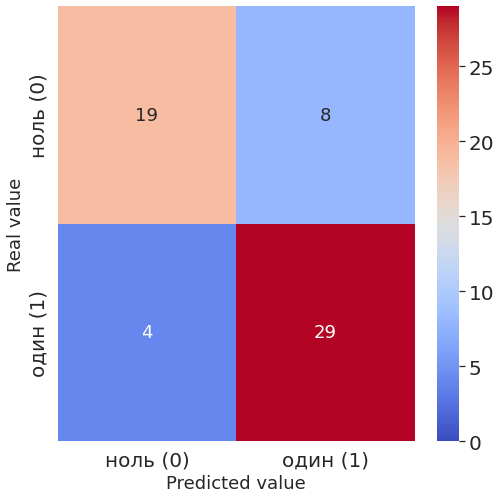

              precision    recall  f1-score   support

           0       0.83      0.70      0.76        27
           1       0.78      0.88      0.83        33

    accuracy                           0.80        60
   macro avg       0.80      0.79      0.79        60
weighted avg       0.80      0.80      0.80        60



In [81]:
ShowHeat(logreg3_pred)

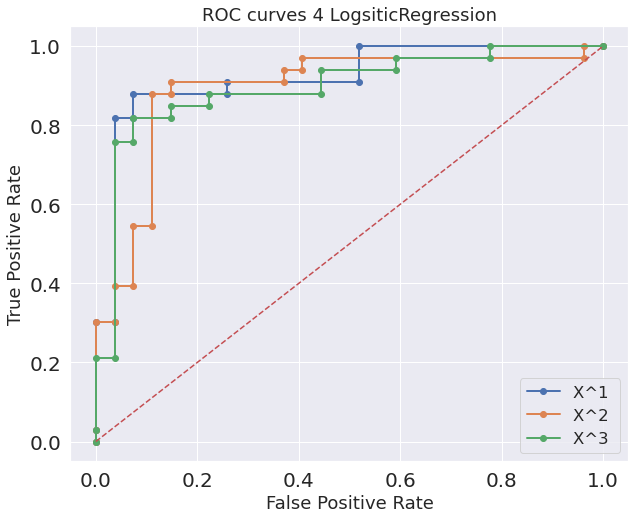

In [82]:
plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = roc_curve(y_test, logreg_gs.predict_proba(X_test)[:,1], pos_label=1)
fpr2, tpr2, thresholds2 = roc_curve(y_test, logreg2_gs.predict_proba(X2_test)[:,1], pos_label=1)
fpr3, tpr3, thresholds3 = roc_curve(y_test, logreg3_gs.predict_proba(X3_test)[:,1], pos_label=1)
lw = 2
plt.plot(fpr, tpr, 'o-', lw=lw, label='X^1 ')
plt.plot(fpr2, tpr2, 'o-', lw=lw, label='X^2 ')
plt.plot(fpr3, tpr3, 'o-', lw=lw, label='X^3 ')
plt.plot([0, 1], [0, 1], '--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves 4 LogsiticRegression')
plt.legend()
#plt.savefig("ROC.png")
plt.show()

In [83]:
thresholds

array([1.99398698, 0.99398698, 0.96691001, 0.96107056, 0.66651838,
       0.63163894, 0.60878102, 0.36824308, 0.33829028, 0.15059176,
       0.07348061, 0.00325414])

In [84]:
print('LogReg ROC_AUC_Score on:')
print(f'X^1 : {np.round(roc_auc_score(y_test, logreg_pred),4)}')
print(f'X^2 : {np.round(roc_auc_score(y_test, logreg2_pred),4)}')
print(f'X^3 : {np.round(roc_auc_score(y_test, logreg3_pred),4)}')

LogReg ROC_AUC_Score on:
X^1 : 0.8468
X^2 : 0.862
X^3 : 0.7912


### RandomForest

Результат RandomForestClassifier со стандартными параметрами...

[[21  6]
 [ 6 27]]


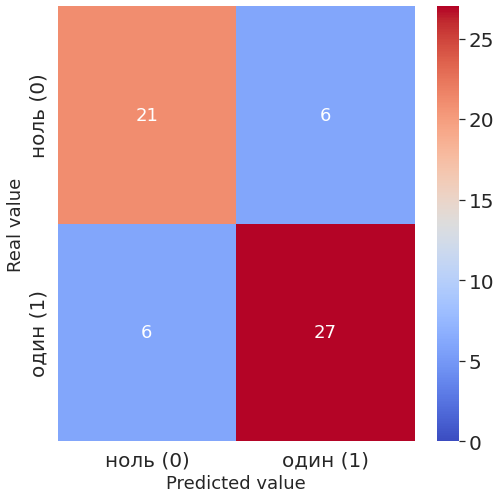

              precision    recall  f1-score   support

           0       0.78      0.78      0.78        27
           1       0.82      0.82      0.82        33

    accuracy                           0.80        60
   macro avg       0.80      0.80      0.80        60
weighted avg       0.80      0.80      0.80        60



In [85]:
rfcl = RandomForestClassifier(n_jobs=-1)
rfcl.fit(X_train, y_train)
rfcl_pred = rfcl.predict(X_test)
ShowHeat(rfcl_pred)

In [86]:
from sklearn.model_selection import RandomizedSearchCV

Попробуем перебрать параметры модели...по аналогии с первыми двумя...но т.к. параметров много, будем проходить не по всей сетке параметров, а только по выборочным сочетаниям.

In [87]:
%%time
n_estimators = np.linspace(100, 1000, 10, dtype=int)
max_features = ['log2', 'sqrt']
max_depth = np.linspace(1, 15, 15, dtype=int)
min_samples_split = np.linspace(2, 50, 10, dtype=int)
min_samples_leaf = np.linspace(2, 50, 10, dtype=int)
bootstrap = [True, False]
param_dist = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
   
rf_gs = RandomizedSearchCV(rfcl, 
                        param_dist, 
                        n_iter = 150, 
                        cv = 4, 
                        verbose = 0,
                        scoring='f1_macro',   
                        n_jobs=-1, 
                        random_state=2909)

rf_gs.fit(X_train, y_train)
rf_pred = rf_gs.predict(X_test)

CPU times: user 9.31 s, sys: 2.8 s, total: 12.1 s
Wall time: 3min 4s


In [88]:
rf_gs.best_params_

{'n_estimators': 100,
 'min_samples_split': 12,
 'min_samples_leaf': 18,
 'max_features': 'log2',
 'max_depth': 14,
 'bootstrap': True}

ЛогРегрессия справлялась лучше и быстрее...добавление полиномиальных признаков также не улучшает ситуацию

[[18  9]
 [ 5 28]]


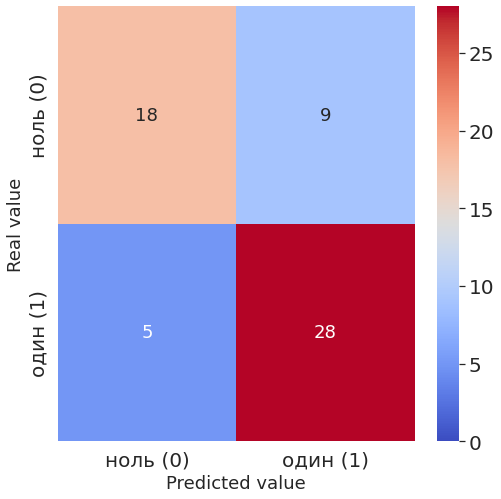

              precision    recall  f1-score   support

           0       0.78      0.67      0.72        27
           1       0.76      0.85      0.80        33

    accuracy                           0.77        60
   macro avg       0.77      0.76      0.76        60
weighted avg       0.77      0.77      0.76        60



In [89]:
ShowHeat(rf_pred)

In [90]:
%%time
rf2_gs = RandomizedSearchCV(rfcl, 
                        param_dist, 
                        n_iter = 150, 
                        cv = 4, 
                        verbose = 0,
                        scoring='f1_macro',   
                        n_jobs=-1, 
                        random_state=2909)

rf2_gs.fit(X2_train, y_train)
rf2_pred = rf2_gs.predict(X2_test)

CPU times: user 11.4 s, sys: 3.13 s, total: 14.6 s
Wall time: 3min 13s


[[19  8]
 [ 4 29]]


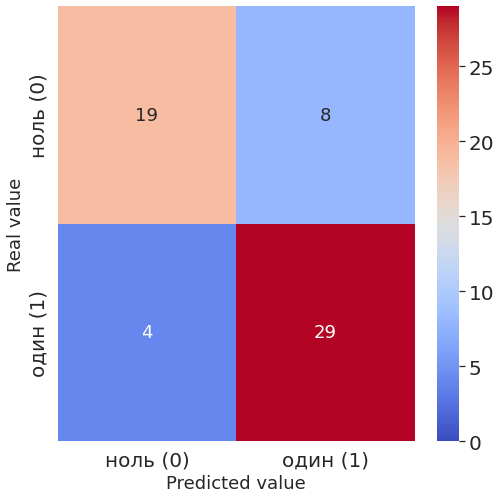

              precision    recall  f1-score   support

           0       0.83      0.70      0.76        27
           1       0.78      0.88      0.83        33

    accuracy                           0.80        60
   macro avg       0.80      0.79      0.79        60
weighted avg       0.80      0.80      0.80        60



In [91]:
ShowHeat(rf2_pred)

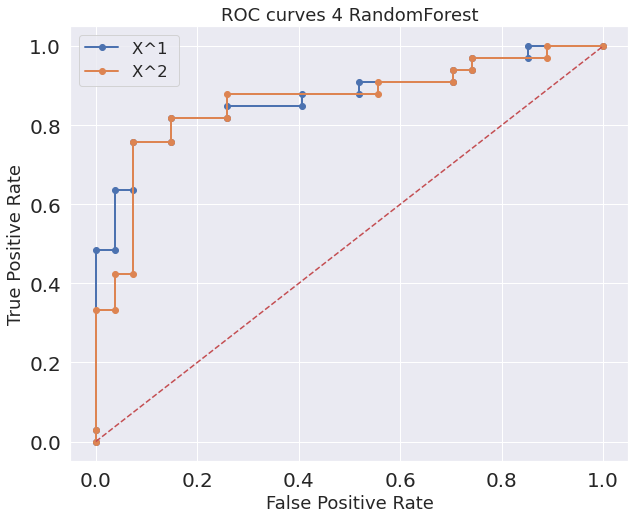

In [92]:
plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = roc_curve(y_test, rf_gs.predict_proba(X_test)[:,1], pos_label=1)
fpr2, tpr2, thresholds2 = roc_curve(y_test, rf2_gs.predict_proba(X2_test)[:,1], pos_label=1)
lw = 2
plt.plot(fpr, tpr, 'o-', lw=lw, label='X^1 ')
plt.plot(fpr2, tpr2, 'o-', lw=lw, label='X^2 ')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves 4 RandomForest')
plt.legend()
#plt.savefig("ROC.png")
plt.show()

In [93]:
print('RandomForest ROC_AUC_Score on:')
print(f'X^1 : {np.round(roc_auc_score(y_test, rf_pred),4)}')
print(f'X^2 : {np.round(roc_auc_score(y_test, rf2_pred),4)}')

RandomForest ROC_AUC_Score on:
X^1 : 0.7576
X^2 : 0.7912


Можно посмотреть распределение признаков по "важности"...

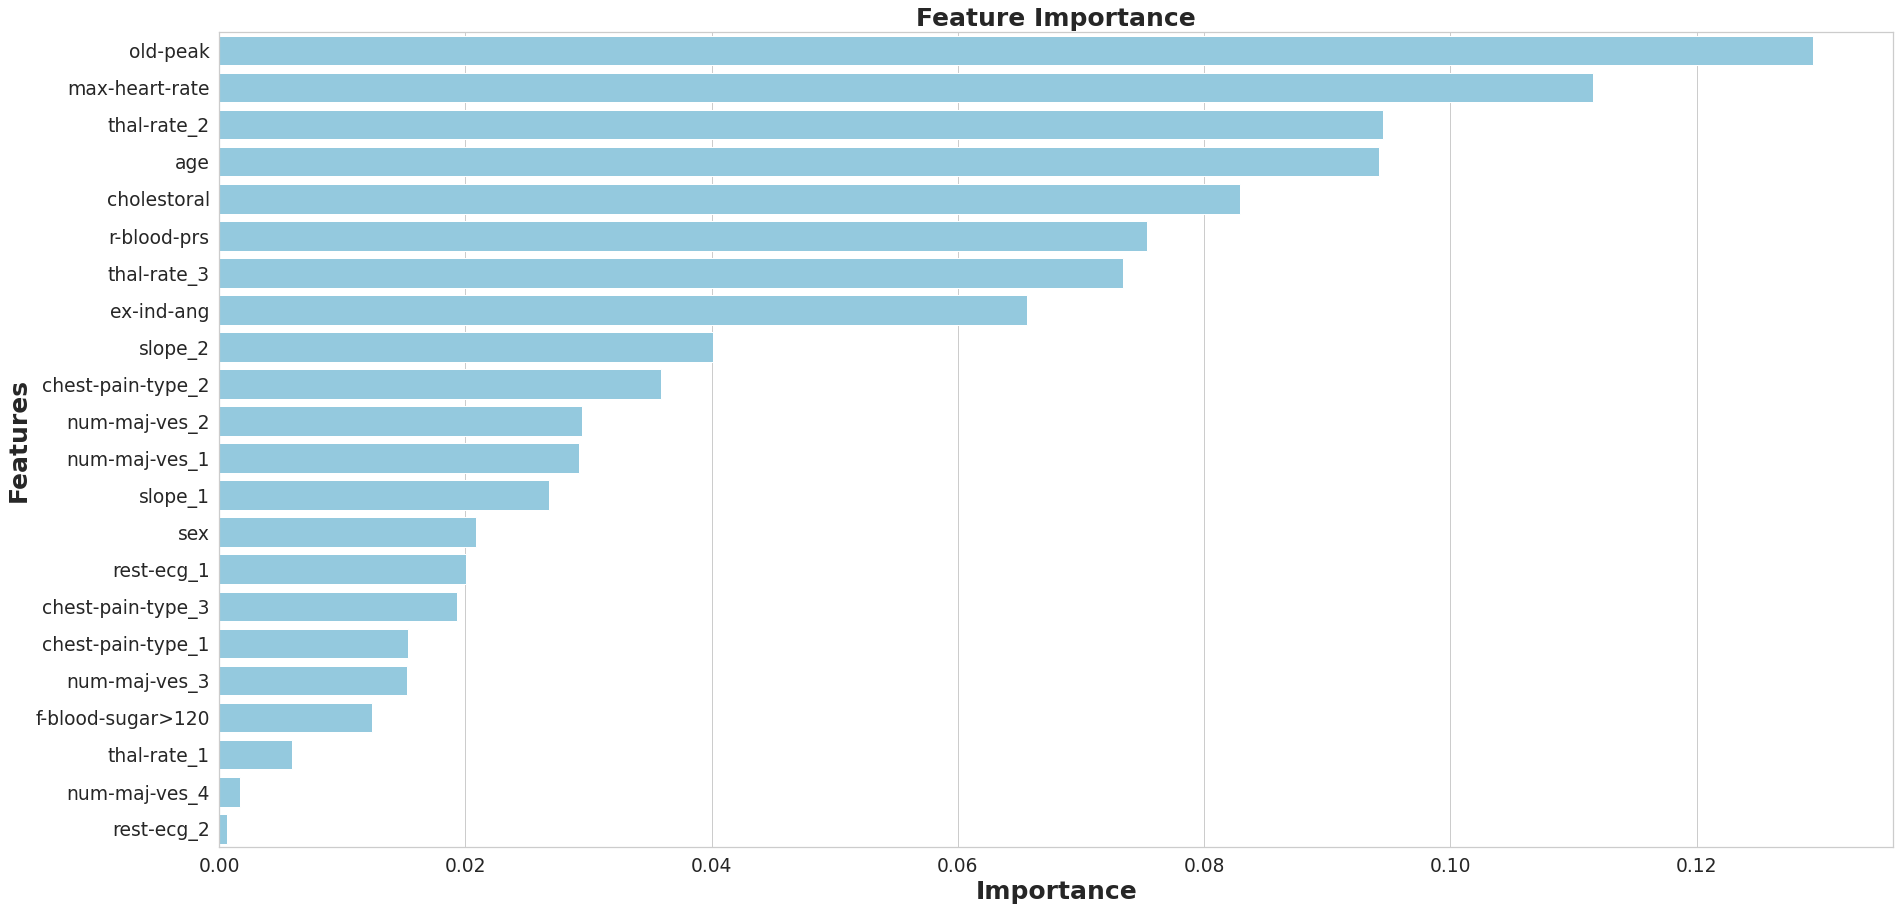

None

,Features,Gini-Importance
0,old-peak,0.129492
1,max-heart-rate,0.111624
2,thal-rate_2,0.094521
3,age,0.094228
4,cholestoral,0.082889
5,r-blood-prs,0.075329
6,thal-rate_3,0.073405
7,ex-ind-ang,0.065578
8,slope_2,0.040098
9,chest-pain-type_2,0.035922


In [94]:
feats = {}
for feature, importance in zip(df_train.columns, rfcl.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')
display(plt.show())
display(importances)

### Linear SVM

Модели SVM показывают схожие метрики качества

In [95]:
np.linspace(1, 15, 15, dtype=int)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [96]:
from sklearn.svm import SVC

[[22  5]
 [ 4 29]]


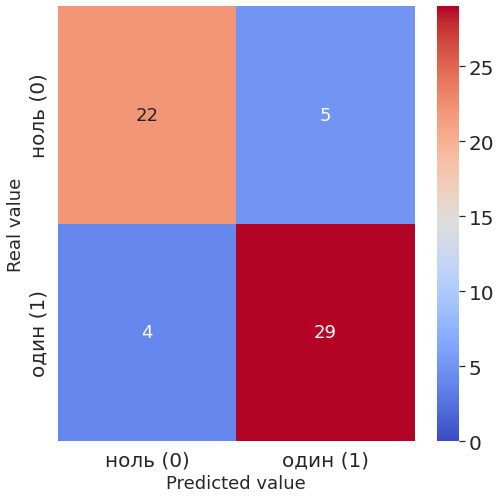

              precision    recall  f1-score   support

           0       0.85      0.81      0.83        27
           1       0.85      0.88      0.87        33

    accuracy                           0.85        60
   macro avg       0.85      0.85      0.85        60
weighted avg       0.85      0.85      0.85        60



In [97]:
sv = SVC(kernel='linear')
sv.fit(X_train, y_train)
sv_pred = sv.predict(X_test)
ShowHeat(sv_pred)

### RBF SVM

In [98]:
np.linspace(0.1, 2, 20)

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ])

In [99]:
sv = SVC()
sv_grid = {'C': np.linspace(0.1, 2, 20)}
sv_gs = GridSearchCV(sv, sv_grid, n_jobs=-1, cv=4, scoring='f1_macro')
sv_gs.fit(X_train, y_train)
sv_pred = sv_gs.predict(X_test)
sv_gs.best_params_

{'C': 1.3}

[[23  4]
 [ 4 29]]


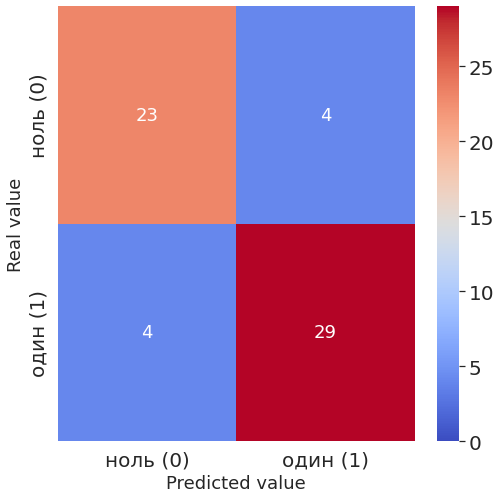

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        27
           1       0.88      0.88      0.88        33

    accuracy                           0.87        60
   macro avg       0.87      0.87      0.87        60
weighted avg       0.87      0.87      0.87        60



In [100]:
ShowHeat(sv_pred)

В целом, все модели показывают схожие метрики качества и очень сильно зависят от разбиения на train и test части (очень маленький датасет?).
Изменяя разбиение train/test можно добиться значений f1_macro для любой модели в диапазоне от 0.7 до 0.95


Не понял, надо ли как-то дальше (после OneHotEncoding) обрабатывать колонки с категориальными признаками...
...среднее у них не ноль, стандартное отклонение меньше 1...

Попытки как-то обработать эти признаки:

-- применить StandardScaler() (получается что мы увеличиваем дисперсию)

-- вычесть из все колонок по 0.5 

-- или вычесть из всех колонок среднее, чтобы получить выборочное среднее равное нулю

приводят к сходным или худшим метрикам качества моделей...

Для примера, ниже приведены результаты KNN и LogReg для нормализованных категориальных признаков

In [101]:
df_train = df_save_train.copy()
df_train_test = df_save_test.copy()

##### Проведем нормализацию в том числе и категориальных признаков

In [102]:
df_train.head(3)

,age,sex,r-blood-prs,cholestoral,f-blood-sugar>120,max-heart-rate,ex-ind-ang,old-peak,chest-pain-type_1,chest-pain-type_2,chest-pain-type_3,rest-ecg_1,rest-ecg_2,slope_1,slope_2,num-maj-ves_1,num-maj-ves_2,num-maj-ves_3,num-maj-ves_4,thal-rate_1,thal-rate_2,thal-rate_3,target
229,1.067695,1,-0.365929,1.286628,0,-0.807692,1,0.683203,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0
62,-0.232029,1,-0.768692,-1.196826,0,1.716525,0,-0.921131,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1
182,0.742764,0,-0.078241,1.710632,0,0.818075,0,-0.921131,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0


In [103]:
df_train.shape

(239, 23)

In [104]:
cat_columns_encoded = list(set(df_train.columns) - set(num_columns) - set(['target']))
len(cat_columns_encoded)

17

In [105]:
ct_cat = ColumnTransformer([("cat_prep", StandardScaler(), cat_columns_encoded)])
df_train_ct_cat = ct_cat.fit_transform(df_train)
tmp = pd.DataFrame(df_train_ct_cat,
                   columns=cat_columns_encoded,
                   index=df_train.index)
df_train[cat_columns_encoded] = tmp[cat_columns_encoded]

In [106]:
df_train

,age,sex,r-blood-prs,cholestoral,f-blood-sugar>120,max-heart-rate,ex-ind-ang,old-peak,chest-pain-type_1,chest-pain-type_2,chest-pain-type_3,rest-ecg_1,rest-ecg_2,slope_1,slope_2,num-maj-ves_1,num-maj-ves_2,num-maj-ves_3,num-maj-ves_4,thal-rate_1,thal-rate_2,thal-rate_3,target
229,1.067695,0.669690,-0.365929,1.286628,-0.427982,-0.807692,1.478738,0.683203,-0.45505,1.585782,-0.293877,1.004193,-0.130466,1.092090,-0.939090,-0.527328,-0.371612,-0.26786,-0.130466,-0.239838,-1.073850,1.209925,0
62,-0.232029,0.669690,-0.768692,-1.196826,-0.427982,1.716525,-0.676252,-0.921131,-0.45505,-0.630604,3.402785,-0.995825,-0.130466,1.092090,-0.939090,-0.527328,-0.371612,-0.26786,-0.130466,4.169486,-1.073850,-0.826498,1
182,0.742764,-1.493228,-0.078241,1.710632,-0.427982,0.818075,-0.676252,-0.921131,-0.45505,-0.630604,-0.293877,-0.995825,-0.130466,-0.915675,1.064861,-0.527328,-0.371612,-0.26786,-0.130466,-0.239838,0.931229,-0.826498,0
300,1.500936,0.669690,0.727284,-1.055491,2.336549,-0.379859,-0.676252,2.109278,-0.45505,-0.630604,-0.293877,1.004193,-0.130466,1.092090,-0.939090,-0.527328,2.690981,-0.26786,-0.130466,-0.239838,-1.073850,1.209925,0
299,-0.990201,0.669690,-1.228992,0.378047,-0.427982,-0.764909,-0.676252,0.148425,-0.45505,-0.630604,3.402785,1.004193,-0.130466,1.092090,-0.939090,-0.527328,-0.371612,-0.26786,-0.130466,-0.239838,-1.073850,1.209925,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,-1.098511,0.669690,-0.653617,-1.540067,-0.427982,-0.251509,1.478738,1.574500,-0.45505,-0.630604,-0.293877,1.004193,-0.130466,-0.915675,-0.939090,-0.527328,-0.371612,-0.26786,-0.130466,4.169486,-1.073850,-0.826498,0
22,-1.315132,0.669690,0.497134,-0.389199,-0.427982,1.203125,-0.676252,-0.921131,-0.45505,-0.630604,-0.293877,1.004193,-0.130466,-0.915675,1.064861,-0.527328,-0.371612,-0.26786,-0.130466,-0.239838,0.931229,-0.826498,1
92,-0.232029,0.669690,0.382059,-0.449771,-0.427982,0.818075,-0.676252,-0.921131,-0.45505,1.585782,-0.293877,1.004193,-0.130466,-0.915675,1.064861,-0.527328,-0.371612,-0.26786,7.664855,-0.239838,0.931229,-0.826498,1
133,-1.423442,0.669690,-1.228992,-0.207482,-0.427982,0.133541,-0.676252,-0.921131,2.19756,-0.630604,-0.293877,1.004193,-0.130466,-0.915675,1.064861,-0.527328,-0.371612,-0.26786,-0.130466,-0.239838,0.931229,-0.826498,1


In [107]:
df_train.describe()

,age,sex,r-blood-prs,cholestoral,f-blood-sugar>120,max-heart-rate,ex-ind-ang,old-peak,chest-pain-type_1,chest-pain-type_2,chest-pain-type_3,rest-ecg_1,rest-ecg_2,slope_1,slope_2,num-maj-ves_1,num-maj-ves_2,num-maj-ves_3,num-maj-ves_4,thal-rate_1,thal-rate_2,thal-rate_3,target
count,2.390000e+02,2.390000e+02,2.390000e+02,2.390000e+02,2.390000e+02,2.390000e+02,2.390000e+02,2.390000e+02,2.390000e+02,2.390000e+02,2.390000e+02,2.390000e+02,2.390000e+02,2.390000e+02,2.390000e+02,2.390000e+02,2.390000e+02,2.390000e+02,2.390000e+02,2.390000e+02,2.390000e+02,2.390000e+02,239.000000
mean,1.872050e-16,5.853059e-17,7.265806e-16,-1.226355e-16,-1.040544e-16,1.114868e-16,3.994945e-17,-1.021963e-16,3.274926e-17,-1.337842e-16,-6.456946e-17,3.019435e-17,-1.637463e-16,1.319261e-16,-1.008027e-16,-1.161321e-16,-9.058305e-17,-2.229737e-17,-2.062506e-16,-6.619531e-17,9.662192e-17,1.653721e-16,0.543933
std,1.002099e+00,1.002099e+00,1.002099e+00,1.002099e+00,1.002099e+00,1.002099e+00,1.002099e+00,1.002099e+00,1.002099e+00,1.002099e+00,1.002099e+00,1.002099e+00,1.002099e+00,1.002099e+00,1.002099e+00,1.002099e+00,1.002099e+00,1.002099e+00,1.002099e+00,1.002099e+00,1.002099e+00,1.002099e+00,0.499111
min,-2.723165e+00,-1.493228e+00,-2.149593e+00,-2.408267e+00,-4.279817e-01,-2.647376e+00,-6.762522e-01,-9.211310e-01,-4.550502e-01,-6.306035e-01,-2.938769e-01,-9.958246e-01,-1.304656e-01,-9.156755e-01,-9.390899e-01,-5.273280e-01,-3.716117e-01,-2.678598e-01,-1.304656e-01,-2.398377e-01,-1.073850e+00,-8.264978e-01,0.000000
25%,-7.735802e-01,-1.493228e+00,-6.536168e-01,-7.324401e-01,-4.279817e-01,-7.649090e-01,-6.762522e-01,-9.211310e-01,-4.550502e-01,-6.306035e-01,-2.938769e-01,-9.958246e-01,-1.304656e-01,-9.156755e-01,-9.390899e-01,-5.273280e-01,-3.716117e-01,-2.678598e-01,-1.304656e-01,-2.398377e-01,-1.073850e+00,-8.264978e-01,0.000000
50%,9.290213e-02,6.696901e-01,-7.824142e-02,-6.614771e-02,-4.279817e-01,1.763247e-01,-6.762522e-01,-2.972232e-01,-4.550502e-01,-6.306035e-01,-2.938769e-01,-9.958246e-01,-1.304656e-01,-9.156755e-01,-9.390899e-01,-5.273280e-01,-3.716117e-01,-2.678598e-01,-1.304656e-01,-2.398377e-01,9.312290e-01,-8.264978e-01,1.000000
75%,7.427639e-01,6.696901e-01,4.971339e-01,6.001447e-01,-4.279817e-01,7.752916e-01,1.478738e+00,6.832032e-01,-4.550502e-01,1.585782e+00,-2.938769e-01,1.004193e+00,-1.304656e-01,1.092090e+00,1.064861e+00,-5.273280e-01,-3.716117e-01,-2.678598e-01,-1.304656e-01,-2.398377e-01,9.312290e-01,1.209925e+00,1.000000
max,2.475729e+00,6.696901e-01,3.949386e+00,3.467221e+00,2.336549e+00,2.229925e+00,1.478738e+00,3.000575e+00,2.197560e+00,1.585782e+00,3.402785e+00,1.004193e+00,7.664855e+00,1.092090e+00,1.064861e+00,1.896353e+00,2.690981e+00,3.733296e+00,7.664855e+00,4.169486e+00,9.312290e-01,1.209925e+00,1.000000


In [108]:
df_test_ct_cat = ct_cat.transform(df_test)
tmp = pd.DataFrame(df_test_ct_cat,
                   columns=cat_columns_encoded,
                   index=df_test.index)
df_test[cat_columns_encoded] = tmp[cat_columns_encoded]

In [109]:
df_test.describe()

,age,sex,r-blood-prs,cholestoral,f-blood-sugar>120,max-heart-rate,ex-ind-ang,old-peak,chest-pain-type_1,chest-pain-type_2,chest-pain-type_3,rest-ecg_1,rest-ecg_2,slope_1,slope_2,num-maj-ves_1,num-maj-ves_2,num-maj-ves_3,num-maj-ves_4,thal-rate_1,thal-rate_2,thal-rate_3,target
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,6.000000e+01,60.000000,60.000000,60.000000,60.000000,60.000000,6.000000e+01,60.000000,60.000000,60.000000,60.000000
mean,0.112759,-0.051283,0.050259,0.053987,-0.059378,-0.042583,0.149827,-0.110051,-0.057159,-0.002628,-0.047433,0.037518,-1.304656e-01,0.088207,0.029486,-0.002197,0.087777,-0.067802,-1.304656e-01,0.127606,0.162616,-0.249511,0.550000
std,0.891699,1.028214,1.045134,0.875648,0.947690,0.892164,1.056595,0.871699,0.955164,1.007169,0.929891,1.007887,1.399490e-16,1.012354,1.009869,1.006919,1.102793,0.879391,1.679388e-16,1.228957,0.983093,0.925390,0.501692
min,-1.856683,-1.493228,-2.149593,-1.600639,-0.427982,-3.374693,-0.676252,-0.921131,-0.455050,-0.630604,-0.293877,-0.995825,-1.304656e-01,-0.915675,-0.939090,-0.527328,-0.371612,-0.267860,-1.304656e-01,-0.239838,-1.073850,-0.826498,0.000000
25%,-0.475727,-1.493228,-0.653617,-0.510343,-0.427982,-0.337076,-0.676252,-0.921131,-0.455050,-0.630604,-0.293877,-0.995825,-1.304656e-01,-0.915675,-0.939090,-0.527328,-0.371612,-0.267860,-1.304656e-01,-0.239838,-1.073850,-0.826498,0.000000
50%,0.309523,0.669690,-0.078241,-0.116624,-0.427982,0.047975,-0.676252,-0.208094,-0.455050,-0.630604,-0.293877,1.004193,-1.304656e-01,0.088207,-0.939090,-0.527328,-0.371612,-0.267860,-1.304656e-01,-0.239838,0.931229,-0.826498,1.000000
75%,0.742764,0.669690,0.497134,0.524430,-0.427982,0.518591,1.478738,0.192990,-0.455050,1.585782,-0.293877,1.004193,-1.304656e-01,1.092090,1.064861,-0.527328,-0.371612,-0.267860,-1.304656e-01,-0.239838,0.931229,1.209925,1.000000
max,1.717556,0.669690,2.683560,3.305696,2.336549,1.545392,1.478738,2.822316,2.197560,1.585782,3.402785,1.004193,-1.304656e-01,1.092090,1.064861,1.896353,2.690981,3.733296,-1.304656e-01,4.169486,0.931229,1.209925,1.000000


In [110]:
X_train = np.array(df_train[df_train.columns[:-1]])
y_train = np.array(df_train[df_train.columns[-1]])
X_test = np.array(df_test[df_test.columns[:-1]])
y_test = np.array(df_test[df_test.columns[-1]])

In [111]:
X2_train = poly2.fit_transform(X_train)
X2_test = poly2.fit_transform(X_test)
X3_train = poly3.fit_transform(X_train)
X3_test = poly3.fit_transform(X_test)

In [112]:
knn_gs_cs = GridSearchCV(knn, knn_grid, cv=4, n_jobs=-1, scoring='f1_macro', verbose = 0)
knn_gs_cs.fit(X_train, y_train)
knn_pred_cs = knn_gs_cs.predict(X_test)

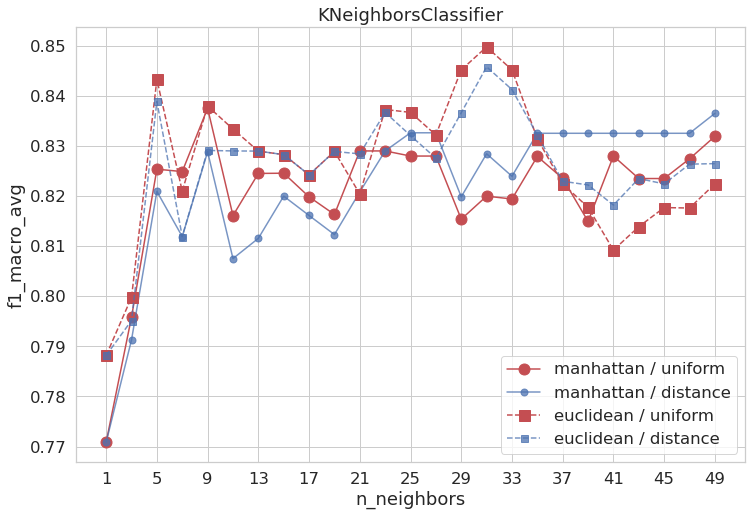

In [113]:
ShowKNNgs(knn_gs_cs)

In [115]:
knn_gs_cs.best_params_, knn_gs_cs.best_score_

({'metric': 'euclidean', 'n_neighbors': 31, 'weights': 'uniform'},
 0.8498768649296143)

[[23  4]
 [ 6 27]]


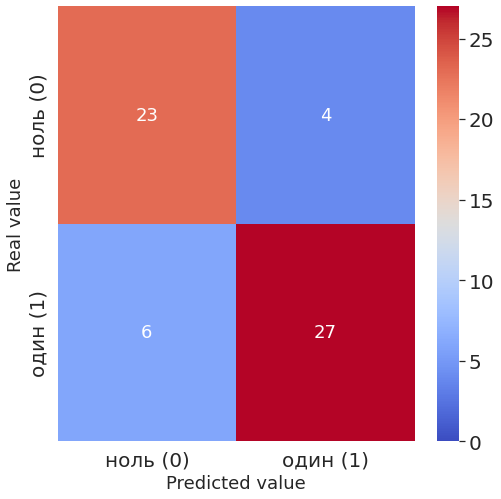

              precision    recall  f1-score   support

           0       0.79      0.85      0.82        27
           1       0.87      0.82      0.84        33

    accuracy                           0.83        60
   macro avg       0.83      0.84      0.83        60
weighted avg       0.84      0.83      0.83        60



In [116]:
ShowHeat(knn_pred_cs)

[[18  9]
 [ 4 29]]


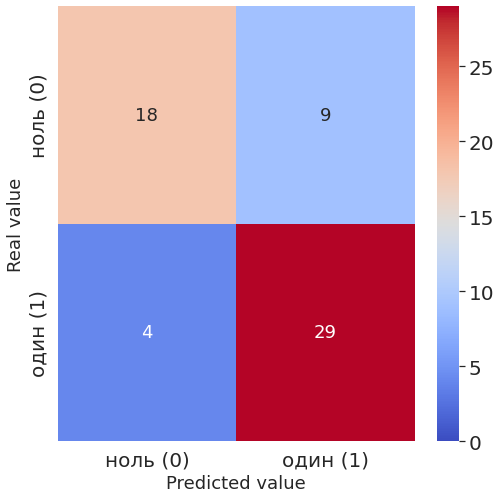

              precision    recall  f1-score   support

           0       0.82      0.67      0.73        27
           1       0.76      0.88      0.82        33

    accuracy                           0.78        60
   macro avg       0.79      0.77      0.78        60
weighted avg       0.79      0.78      0.78        60



In [117]:
knn2_gs_cs = GridSearchCV(knn, knn_grid, cv=4, n_jobs=-1, scoring='f1_macro', verbose = 0)
knn2_gs_cs.fit(X2_train, y_train)
ShowHeat(knn2_gs_cs.predict(X2_test))

[[21  6]
 [ 4 29]]


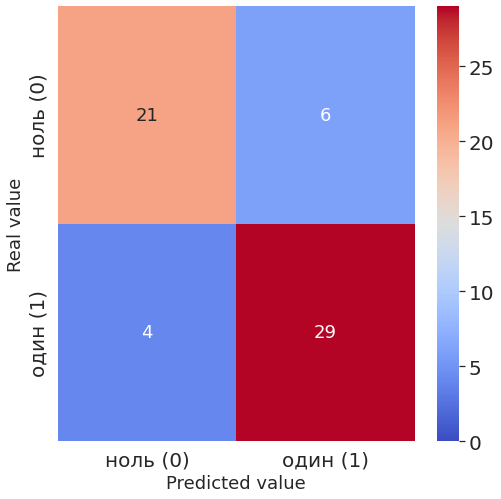

              precision    recall  f1-score   support

           0       0.84      0.78      0.81        27
           1       0.83      0.88      0.85        33

    accuracy                           0.83        60
   macro avg       0.83      0.83      0.83        60
weighted avg       0.83      0.83      0.83        60



In [118]:
knn3_gs_cs = GridSearchCV(knn, knn_grid, cv=4, n_jobs=-1, scoring='f1_macro', verbose = 0)
knn3_gs_cs.fit(X3_train, y_train)
ShowHeat(knn3_gs_cs.predict(X3_test))

[[23  4]
 [ 4 29]]


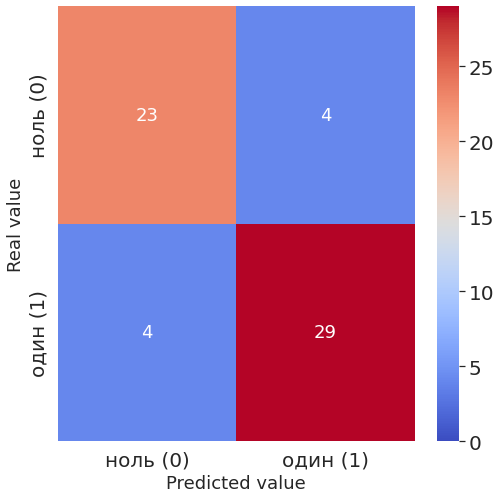

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        27
           1       0.88      0.88      0.88        33

    accuracy                           0.87        60
   macro avg       0.87      0.87      0.87        60
weighted avg       0.87      0.87      0.87        60



In [119]:
logreg_gs_cs = GridSearchCV(logreg, logreg_grid, n_jobs=-1, cv=4, scoring='f1_macro')
logreg_gs_cs.fit(X_train, y_train)
ShowHeat(logreg_gs_cs.predict(X_test))

[[23  4]
 [ 5 28]]


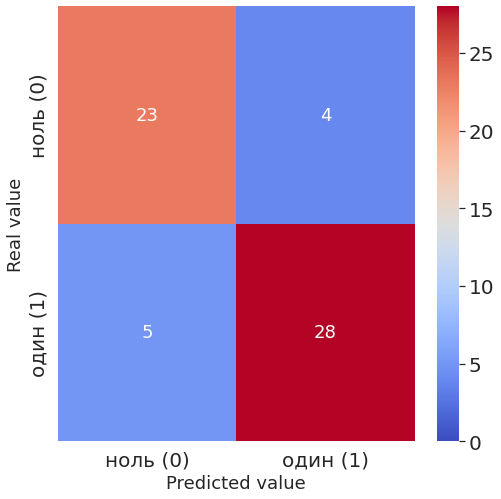

              precision    recall  f1-score   support

           0       0.82      0.85      0.84        27
           1       0.88      0.85      0.86        33

    accuracy                           0.85        60
   macro avg       0.85      0.85      0.85        60
weighted avg       0.85      0.85      0.85        60



In [120]:
logreg2_gs_cs = GridSearchCV(logreg, logreg_grid, n_jobs=-1, cv=4, scoring='f1_macro')
logreg2_gs_cs.fit(X2_train, y_train)
ShowHeat(logreg2_gs_cs.predict(X2_test))